In [71]:
import re
import pandas as pd


In [72]:
f = open('chat_data', 'r', encoding='utf-8')

In [73]:
data = f.read()
print(data)

08/05/2022, 11:29 am - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
08/05/2022, 11:04 am - Abishec: <Media omitted>
08/05/2022, 11:04 am - Abishec: <Media omitted>
08/05/2022, 11:03 am - Abishec: Missed voice call
08/05/2022, 5:58 pm - Abishec: Missed voice call
09/05/2022, 7:04 am - Abishec: https://youtu.be/KoqgDIaJY68
09/05/2022, 3:51 pm - Aamod Pratap Chaudhary: Kathi karai chi rai
09/05/2022, 4:40 pm - Abishec: Nai kucho
09/05/2022, 8:02 pm - Abishec: Missed voice call
09/05/2022, 8:18 pm - Abishec: Missed video call
10/05/2022, 9:59 am - Abishec: <Media omitted>
10/05/2022, 10:50 am - Abishec: Missed voice call
10/05/2022, 4:11 pm - Abishec: https://www.instagram.com/p/CdVmXG5J8Y-/?igshid=MDJmNzVkMjY=
10/05/2022, 4:12 pm - Abishec: https://www.instagram.com/p/CdK9FOFpIMS/?igshid=MDJmNzVkMjY=
10/05/2022, 5:55 pm - Aamod Pratap Chaudhary: IMG-20220510-WA0001.jpg (file attached)
10/05/2022

In [74]:
#pattern='\d{1,2}\/\d{1,2}\/\d{2},\s\d{1,2}:\d{2}\s(?:AM|PM)'
pattern = '\d{1,2}\/\d{2,4}\/\d{2,4},\s\d{1,2}:\d{1,2}\s\w{1,2}\s-\s'

In [75]:
messages = re.split(pattern, data)[1:]
len(messages)

126

In [76]:
#messages

In [77]:
dates = re.findall(pattern, data)

In [78]:
#dates

In [79]:
df = pd.DataFrame({'user_message': messages,'message_date': dates})

In [80]:
df['dates'] = df['message_date'].str.findall('\d{1,2}/\d{1,2}/\d{2,4}').apply(lambda x:x[0])
df['time'] = df['message_date'].str.findall('\d{1,2}:\d{1,2}\s[a-z]+').apply(lambda x:x[0])

def change_to_24hr(x):
  t_splt = x.split(':')
  if t_splt[1][3:] == 'pm' and t_splt[0] != '12':
      t_splt[0] = str(12+ int(t_splt[0]))
  elif int(t_splt[0])==12 and t_splt[1][3:] == 'am':
      t_splt[0] = '00'
  t_splt[1] = t_splt[1][:2]
  return ':'.join(t_splt)

df['time_24']= df['time'].apply(lambda x: change_to_24hr(x))

df['message_date'] = df.agg(lambda x: f"{x['dates']} {x['time_24']}", axis=1)
df = df[['user_message', 'message_date']]



In [81]:
df['message_date'] = pd.to_datetime(df['message_date'], format = '%d/%m/%Y %H:%M')

In [82]:
df.head()

,user_message,message_date
0,Messages and calls are end-to-end encrypted. N...,2022-05-08 11:29:00
1,Abishec: <Media omitted>\n,2022-05-08 11:04:00
2,Abishec: <Media omitted>\n,2022-05-08 11:04:00
3,Abishec: Missed voice call\n,2022-05-08 11:03:00
4,Abishec: Missed voice call\n,2022-05-08 17:58:00


In [83]:
df.rename(columns = {'message_date': 'date'}, inplace = True)

In [84]:
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2022-05-08 11:29:00
1,Abishec: <Media omitted>\n,2022-05-08 11:04:00
2,Abishec: <Media omitted>\n,2022-05-08 11:04:00
3,Abishec: Missed voice call\n,2022-05-08 11:03:00
4,Abishec: Missed voice call\n,2022-05-08 17:58:00


In [85]:
#seperate users and messages
users=[]
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        #username
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
        
df['user'] = users
df['message'] = messages
df.drop(columns = ['user_message'], inplace = True)
df.head()

,date,user,message
0,2022-05-08 11:29:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2022-05-08 11:04:00,Abishec,<Media omitted>\n
2,2022-05-08 11:04:00,Abishec,<Media omitted>\n
3,2022-05-08 11:03:00,Abishec,Missed voice call\n
4,2022-05-08 17:58:00,Abishec,Missed voice call\n


In [86]:
df.head(10)

,date,user,message
0,2022-05-08 11:29:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2022-05-08 11:04:00,Abishec,<Media omitted>\n
2,2022-05-08 11:04:00,Abishec,<Media omitted>\n
3,2022-05-08 11:03:00,Abishec,Missed voice call\n
4,2022-05-08 17:58:00,Abishec,Missed voice call\n
5,2022-05-09 07:04:00,Abishec,https://youtu.be/KoqgDIaJY68\n
6,2022-05-09 15:51:00,Aamod Pratap Chaudhary,Kathi karai chi rai\n
7,2022-05-09 16:40:00,Abishec,Nai kucho\n
8,2022-05-09 20:02:00,Abishec,Missed voice call\n
9,2022-05-09 20:18:00,Abishec,Missed video call\n


In [87]:
df['year'] = df['date'].dt.year


In [88]:
df.head(10)

,date,user,message,year
0,2022-05-08 11:29:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022
1,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022
2,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022
3,2022-05-08 11:03:00,Abishec,Missed voice call\n,2022
4,2022-05-08 17:58:00,Abishec,Missed voice call\n,2022
5,2022-05-09 07:04:00,Abishec,https://youtu.be/KoqgDIaJY68\n,2022
6,2022-05-09 15:51:00,Aamod Pratap Chaudhary,Kathi karai chi rai\n,2022
7,2022-05-09 16:40:00,Abishec,Nai kucho\n,2022
8,2022-05-09 20:02:00,Abishec,Missed voice call\n,2022
9,2022-05-09 20:18:00,Abishec,Missed video call\n,2022


In [89]:
df.sample(10)

,date,user,message,year
87,2022-05-21 18:46:00,Abishec,<Media omitted>\n,2022
19,2022-05-10 20:31:00,Aamod Pratap Chaudhary,Bauhtek time xai\n,2022
71,2022-05-17 09:22:00,Abishec,https://www.instagram.com/tv/Ccm4bAVjof-/?igsh...,2022
20,2022-05-10 20:31:00,Abishec,Dekha jya prtai hall me\n,2022
26,2022-05-10 20:34:00,Aamod Pratap Chaudhary,Vat kheli rai\n,2022
36,2022-05-11 08:26:00,Aamod Pratap Chaudhary,Ki karai chi rai chunab ke xuti nai velau\n,2022
93,2022-05-24 11:40:00,Abishec,https://youtu.be/KEUt0ixCAb8\n,2022
104,2022-06-07 20:09:00,Abishec,Ha\n,2022
103,2022-06-07 19:30:00,Aamod Pratap Chaudhary,"rai ""linked in"" naam ke yekta facebook page xa...",2022
112,2022-07-01 21:38:00,Abishec,https://youtu.be/YcVjUUKqP6I\n,2022


In [90]:
df['month'] = df['date'].dt.month_name()

In [91]:
df.head()

,date,user,message,year,month
0,2022-05-08 11:29:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,May
1,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022,May
2,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022,May
3,2022-05-08 11:03:00,Abishec,Missed voice call\n,2022,May
4,2022-05-08 17:58:00,Abishec,Missed voice call\n,2022,May


In [92]:
df['dates'] = df['date'].dt.day

In [93]:
df.head()

,date,user,message,year,month,dates
0,2022-05-08 11:29:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,May,8
1,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022,May,8
2,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022,May,8
3,2022-05-08 11:03:00,Abishec,Missed voice call\n,2022,May,8
4,2022-05-08 17:58:00,Abishec,Missed voice call\n,2022,May,8


In [94]:
df['dates'] = df['date'].dt.month_name()
df.head()

,date,user,message,year,month,dates
0,2022-05-08 11:29:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,May,May
1,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022,May,May
2,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022,May,May
3,2022-05-08 11:03:00,Abishec,Missed voice call\n,2022,May,May
4,2022-05-08 17:58:00,Abishec,Missed voice call\n,2022,May,May


In [95]:
df['hour'] = df['date'].dt.hour
df.head()

,date,user,message,year,month,dates,hour
0,2022-05-08 11:29:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,May,May,11
1,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022,May,May,11
2,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022,May,May,11
3,2022-05-08 11:03:00,Abishec,Missed voice call\n,2022,May,May,11
4,2022-05-08 17:58:00,Abishec,Missed voice call\n,2022,May,May,17


In [96]:
df['minute'] = df['date'].dt.minute
df.head()

,date,user,message,year,month,dates,hour,minute
0,2022-05-08 11:29:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,May,May,11,29
1,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022,May,May,11,4
2,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022,May,May,11,4
3,2022-05-08 11:03:00,Abishec,Missed voice call\n,2022,May,May,11,3
4,2022-05-08 17:58:00,Abishec,Missed voice call\n,2022,May,May,17,58


In [97]:
words = []
for message in df['message']:
    words.extend(message)

In [98]:
len(words)

3726

In [99]:
pip install urlextract

Note: you may need to restart the kernel to use updated packages.


In [100]:
from urlextract import URLExtract

In [101]:
extractor = URLExtract()
urls = extractor.find_urls("www.google.com what is it")

In [102]:
urls

['www.google.com']

In [103]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [104]:
links

['https://youtu.be/KoqgDIaJY68',
 'https://www.instagram.com/p/CdVmXG5J8Y-/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/p/CdK9FOFpIMS/?igshid=MDJmNzVkMjY=',
 'https://youtu.be/NZrX_ES93JA',
 'https://media.discordapp.net/attachments/725403879046643722/973450477482172456/ritikkcasm-10052022-0001.mp4',
 'https://www.instagram.com/reel/Cc089uUgnOG/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/reel/CdLWkMHFfP9/?igshid=MDJmNzVkMjY=',
 'https://youtu.be/R-LtQRqYFqo',
 'https://www.instagram.com/tv/Ccm4bAVjof-/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/p/CdfyY3_IC_H/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/reel/CdLcKG7ly6J/?igshid=MDJmNzVkMjY=',
 'https://youtu.be/C0szesNRNzk',
 'https://www.instagram.com/p/CdhtIpCp3B7/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/reel/Cda9HP2F0KN/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/tv/CdVfm1XAJMT/?igshid=MDJmNzVkMjY=',
 'https://discord.gg/RF3P2eGt',
 'https://youtu.be/KEUt0ixCAb8',
 'https://youtu.be/ABYnqp-b

In [105]:
len(links)

28

In [106]:
x = df['user'].value_counts().head()

In [107]:
x

Abishec                   92
Aamod Pratap Chaudhary    33
group_notification         1
Name: user, dtype: int64

In [108]:
import matplotlib.pyplot as plt

In [109]:
name = x.index
counts = x.values

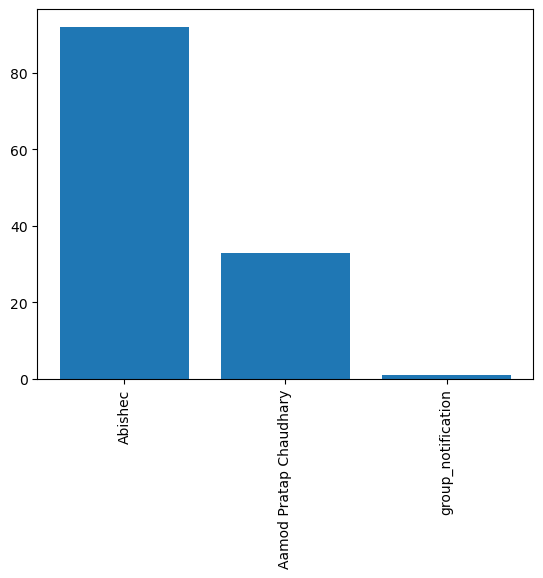

In [110]:
plt.bar(name, counts)
plt.xticks(rotation='vertical')
plt.show()

In [111]:
    round((df['user'].value_counts()/df.shape[0]) * 100, 2).reset_index().rename(columns={'index': 'name', 'user': 'percentage'})

,name,percentage
0,Abishec,73.02
1,Aamod Pratap Chaudhary,26.19
2,group_notification,0.79


In [112]:
words = []
for message in df['message']:
    words.extend(message.split())

In [113]:
len(words)

345

In [114]:
df.head()

,date,user,message,year,month,dates,hour,minute
0,2022-05-08 11:29:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,May,May,11,29
1,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022,May,May,11,4
2,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022,May,May,11,4
3,2022-05-08 11:03:00,Abishec,Missed voice call\n,2022,May,May,11,3
4,2022-05-08 17:58:00,Abishec,Missed voice call\n,2022,May,May,17,58


In [115]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']
temp = temp[temp['message'] != 'Missed voice call\n']
temp = temp[temp['message'] != 'Missed video call\n']
temp

,date,user,message,year,month,dates,hour,minute
5,2022-05-09 07:04:00,Abishec,https://youtu.be/KoqgDIaJY68\n,2022,May,May,7,4
6,2022-05-09 15:51:00,Aamod Pratap Chaudhary,Kathi karai chi rai\n,2022,May,May,15,51
7,2022-05-09 16:40:00,Abishec,Nai kucho\n,2022,May,May,16,40
12,2022-05-10 16:11:00,Abishec,https://www.instagram.com/p/CdVmXG5J8Y-/?igshi...,2022,May,May,16,11
13,2022-05-10 16:12:00,Abishec,https://www.instagram.com/p/CdK9FOFpIMS/?igshi...,2022,May,May,16,12
...,...,...,...,...,...,...,...,...
118,2022-09-25 23:07:00,Aamod Pratap Chaudhary,Sar ki velau rai\n,2022,September,September,23,7
122,2022-10-17 15:34:00,Aamod Pratap Chaudhary,Sar kone vaig jaichirau turant\n,2022,October,October,15,34
123,2022-11-14 21:58:00,Aamod Pratap Chaudhary,Sutli rai\n,2022,November,November,21,58
124,2023-01-16 14:48:00,Aamod Pratap Chaudhary,IMG-20230116-WA0000.jpg (file attached)\n,2023,January,January,14,48


In [116]:
words = []
for message in temp['message']:
    words.extend(message.split())

In [117]:
words

['https://youtu.be/KoqgDIaJY68',
 'Kathi',
 'karai',
 'chi',
 'rai',
 'Nai',
 'kucho',
 'https://www.instagram.com/p/CdVmXG5J8Y-/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/p/CdK9FOFpIMS/?igshid=MDJmNzVkMjY=',
 'IMG-20220510-WA0001.jpg',
 '(file',
 'attached)',
 'IMG-20220510-WA0002.jpg',
 '(file',
 'attached)',
 'https://youtu.be/NZrX_ES93JA',
 'Kaihya',
 'release',
 'hetai',
 'rau',
 'December',
 'Bauhtek',
 'time',
 'xai',
 'Dekha',
 'jya',
 'prtai',
 'hall',
 'me',
 'Jaihe',
 'hame',
 'ta',
 'nai',
 'jebau',
 'Hame',
 'wu',
 'paisa',
 'khebau',
 'Ha',
 're',
 'Ha',
 'ta',
 'kathi',
 'Nai',
 'kucho',
 'Vat',
 'kheli',
 'rai',
 'Aab',
 'jai',
 'xeysi',
 'La',
 'Nik',
 'se',
 'kho',
 'La',
 'https://media.discordapp.net/attachments/725403879046643722/973450477482172456/ritikkcasm-10052022-0001.mp4',
 'Kathi',
 'chiyau',
 'rai',
 'nai',
 'chalai',
 'xau',
 '🤣🤣🤣',
 'Not',
 'funny',
 'Ki',
 'karai',
 'chi',
 'rai',
 'chunab',
 'ke',
 'xuti',
 'nai',
 'velau',
 'xuti',
 'xai',
 'IM

In [118]:
from collections import Counter

In [119]:
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,rai,9
1,(file,8
2,attached),8
3,xai,6
4,ke,6
5,nai,5
6,Ha,3
7,question,3
8,Kathi,2
9,karai,2


In [120]:
df.head()

,date,user,message,year,month,dates,hour,minute
0,2022-05-08 11:29:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,May,May,11,29
1,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022,May,May,11,4
2,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022,May,May,11,4
3,2022-05-08 11:03:00,Abishec,Missed voice call\n,2022,May,May,11,3
4,2022-05-08 17:58:00,Abishec,Missed voice call\n,2022,May,May,17,58


In [121]:
df['month_num'] = df['date'].dt.month

In [122]:
df

,date,user,message,year,month,dates,hour,minute,month_num
0,2022-05-08 11:29:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,May,May,11,29,5
1,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022,May,May,11,4,5
2,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022,May,May,11,4,5
3,2022-05-08 11:03:00,Abishec,Missed voice call\n,2022,May,May,11,3,5
4,2022-05-08 17:58:00,Abishec,Missed voice call\n,2022,May,May,17,58,5
...,...,...,...,...,...,...,...,...,...
121,2022-09-26 08:28:00,Abishec,Missed voice call\n,2022,September,September,8,28,9
122,2022-10-17 15:34:00,Aamod Pratap Chaudhary,Sar kone vaig jaichirau turant\n,2022,October,October,15,34,10
123,2022-11-14 21:58:00,Aamod Pratap Chaudhary,Sutli rai\n,2022,November,November,21,58,11
124,2023-01-16 14:48:00,Aamod Pratap Chaudhary,IMG-20230116-WA0000.jpg (file attached)\n,2023,January,January,14,48,1


In [123]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [124]:
timeline.head()

,year,month_num,month,message
0,2022,5,May,100
1,2022,6,June,12
2,2022,7,July,5
3,2022,9,September,5
4,2022,10,October,1


In [125]:
time = []
for i in range(timeline.shape[0]):
    print(timeline['month'][i] + "-" + str(timeline['year'][i]))

May-2022
June-2022
July-2022
September-2022
October-2022
November-2022
January-2023


In [126]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [127]:
time

['May-2022',
 'June-2022',
 'July-2022',
 'September-2022',
 'October-2022',
 'November-2022',
 'January-2023']

In [128]:
timeline['time'] = time

In [129]:
timeline

,year,month_num,month,message,time
0,2022,5,May,100,May-2022
1,2022,6,June,12,June-2022
2,2022,7,July,5,July-2022
3,2022,9,September,5,September-2022
4,2022,10,October,1,October-2022
5,2022,11,November,1,November-2022
6,2023,1,January,2,January-2023


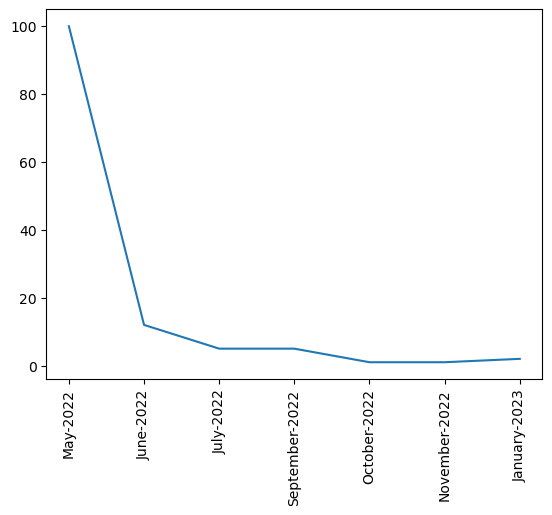

In [130]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation = 'vertical')
plt.show()

In [131]:
df['date_only'] = df['date'].dt.date

In [132]:
daily_timeline = df.groupby('date_only').count()['message'].reset_index()

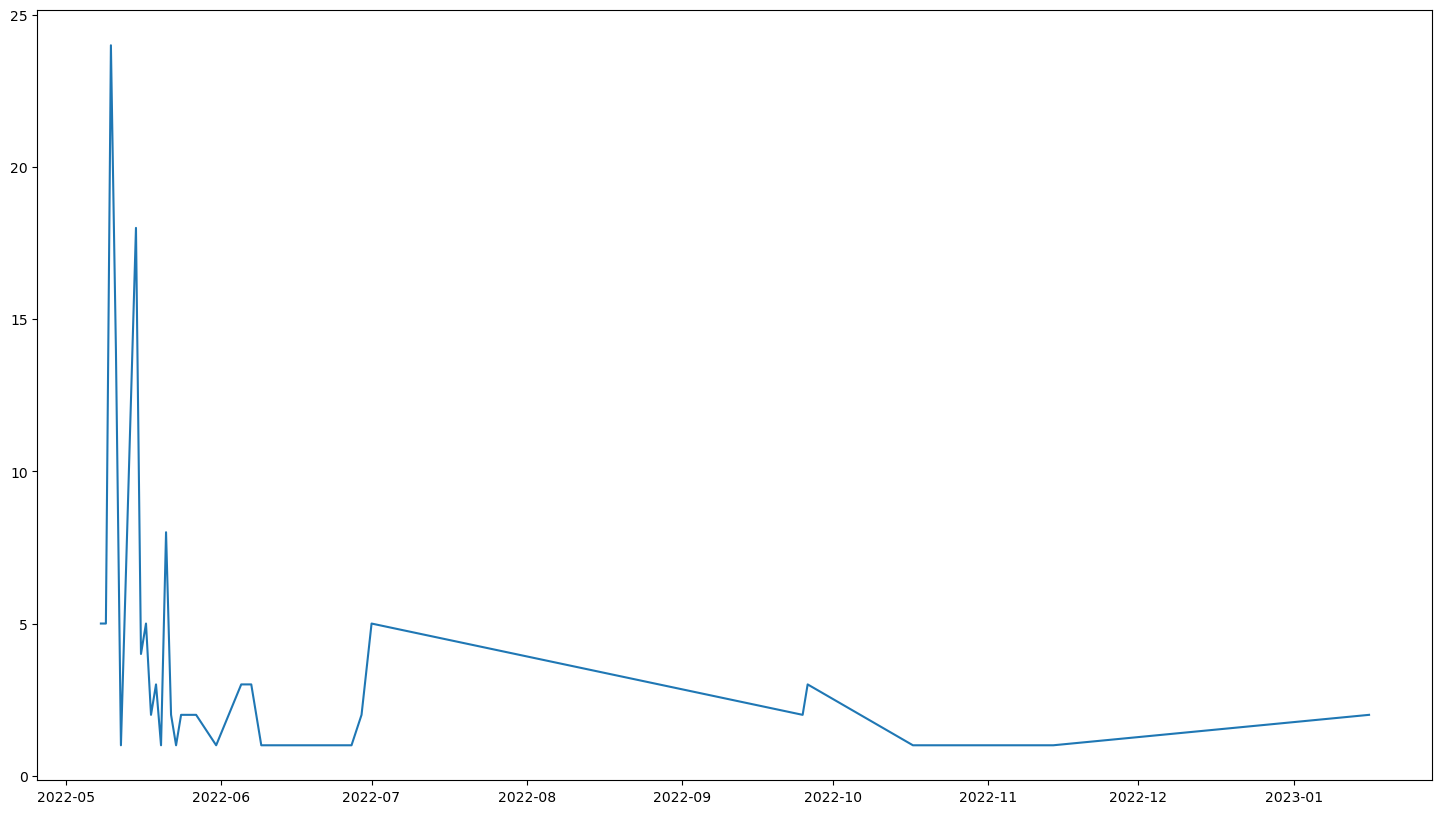

In [133]:
plt.figure(figsize=(18, 10))
plt.plot(daily_timeline['date_only'], daily_timeline['message'])

In [134]:
df

,date,user,message,year,month,dates,hour,minute,month_num,date_only
0,2022-05-08 11:29:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,May,May,11,29,5,2022-05-08
1,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022,May,May,11,4,5,2022-05-08
2,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022,May,May,11,4,5,2022-05-08
3,2022-05-08 11:03:00,Abishec,Missed voice call\n,2022,May,May,11,3,5,2022-05-08
4,2022-05-08 17:58:00,Abishec,Missed voice call\n,2022,May,May,17,58,5,2022-05-08
...,...,...,...,...,...,...,...,...,...,...
121,2022-09-26 08:28:00,Abishec,Missed voice call\n,2022,September,September,8,28,9,2022-09-26
122,2022-10-17 15:34:00,Aamod Pratap Chaudhary,Sar kone vaig jaichirau turant\n,2022,October,October,15,34,10,2022-10-17
123,2022-11-14 21:58:00,Aamod Pratap Chaudhary,Sutli rai\n,2022,November,November,21,58,11,2022-11-14
124,2023-01-16 14:48:00,Aamod Pratap Chaudhary,IMG-20230116-WA0000.jpg (file attached)\n,2023,January,January,14,48,1,2023-01-16


In [136]:
df['day_name'] = df['date'].dt.day_name()

In [138]:
df['day_name'].value_counts()

Tuesday      35
Sunday       30
Wednesday    20
Monday       18
Friday        9
Saturday      8
Thursday      6
Name: day_name, dtype: int64

In [140]:
df

,date,user,message,year,month,dates,hour,minute,month_num,date_only,day_name
0,2022-05-08 11:29:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,May,May,11,29,5,2022-05-08,Sunday
1,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022,May,May,11,4,5,2022-05-08,Sunday
2,2022-05-08 11:04:00,Abishec,<Media omitted>\n,2022,May,May,11,4,5,2022-05-08,Sunday
3,2022-05-08 11:03:00,Abishec,Missed voice call\n,2022,May,May,11,3,5,2022-05-08,Sunday
4,2022-05-08 17:58:00,Abishec,Missed voice call\n,2022,May,May,17,58,5,2022-05-08,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
121,2022-09-26 08:28:00,Abishec,Missed voice call\n,2022,September,September,8,28,9,2022-09-26,Monday
122,2022-10-17 15:34:00,Aamod Pratap Chaudhary,Sar kone vaig jaichirau turant\n,2022,October,October,15,34,10,2022-10-17,Monday
123,2022-11-14 21:58:00,Aamod Pratap Chaudhary,Sutli rai\n,2022,November,November,21,58,11,2022-11-14,Monday
124,2023-01-16 14:48:00,Aamod Pratap Chaudhary,IMG-20230116-WA0000.jpg (file attached)\n,2023,January,January,14,48,1,2023-01-16,Monday


In [147]:
period = []
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
        
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
        
    else:
        period.append(str(hour) +"-" + str(hour + 1))

In [148]:
df['period'] = period

In [149]:
df.sample(10)

,date,user,message,year,month,dates,hour,minute,month_num,date_only,day_name,period
94,2022-05-24 17:56:00,Abishec,Missed video call\n,2022,May,May,17,56,5,2022-05-24,Tuesday,17-18
111,2022-06-29 17:40:00,Aamod Pratap Chaudhary,https://youtube.com/shorts/YHMAXXVnmeU?feature...,2022,June,June,17,40,6,2022-06-29,Wednesday,17-18
104,2022-06-07 20:09:00,Abishec,Ha\n,2022,June,June,20,9,6,2022-06-07,Tuesday,20-21
0,2022-05-08 11:29:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,May,May,11,29,5,2022-05-08,Sunday,11-12
25,2022-05-10 20:33:00,Abishec,Nai kucho\n,2022,May,May,20,33,5,2022-05-10,Tuesday,20-21
96,2022-05-25 18:08:00,Abishec,Missed video call\n,2022,May,May,18,8,5,2022-05-25,Wednesday,18-19
73,2022-05-17 10:07:00,Abishec,This message was deleted\n,2022,May,May,10,7,5,2022-05-17,Tuesday,10-11
41,2022-05-11 08:26:00,Abishec,<Media omitted>\n,2022,May,May,8,26,5,2022-05-11,Wednesday,8-9
108,2022-06-24 18:36:00,Abishec,https://www.instagram.com/reel/CfLoRw1IZaP/?ig...,2022,June,June,18,36,6,2022-06-24,Friday,18-19
5,2022-05-09 07:04:00,Abishec,https://youtu.be/KoqgDIaJY68\n,2022,May,May,7,4,5,2022-05-09,Monday,7-8


In [150]:
import seaborn as sns


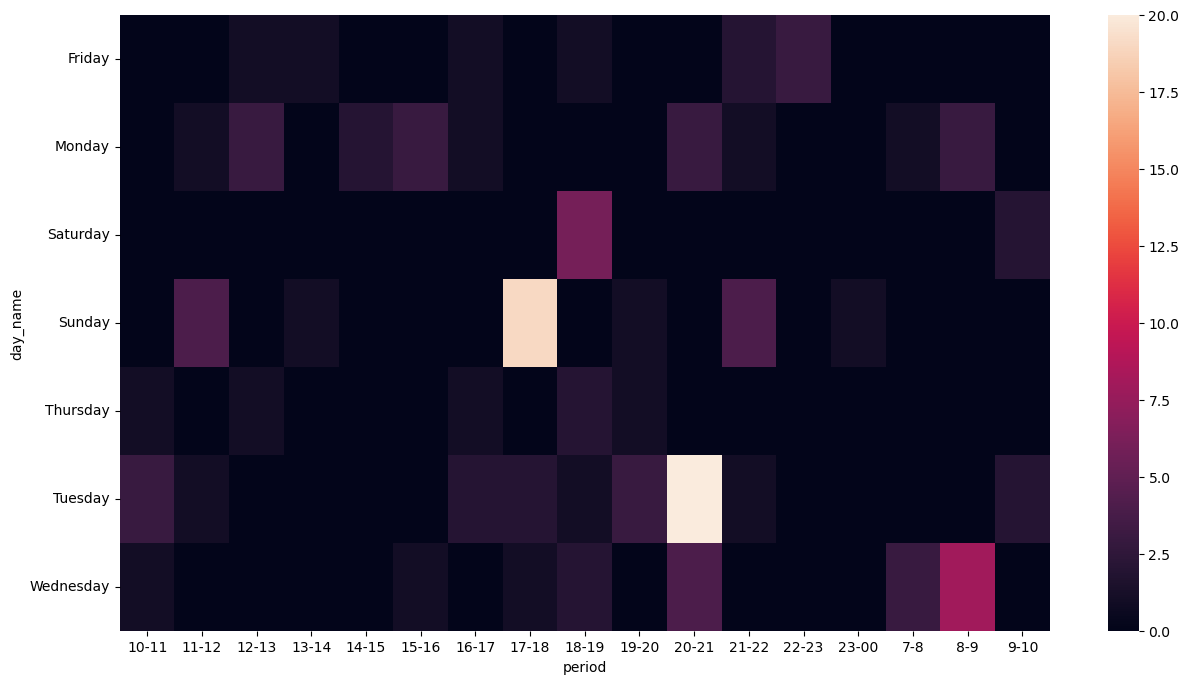

In [159]:
plt.figure(figsize=(15,8))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()